# Simulation Example

Here we demonstrate how to use this package to estimate the multivariate PSD of VAR(2) simulated data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sgvb_psd.utils.sim_varma import SimVARMA

np.random.seed(0)

var2 = SimVARMA(
    n_samples=1024,
    var_coeffs=np.array([[[0.5, 0.], [0., -0.3]], [[0., 0.], [0., -0.5]]]),
    vma_coeffs=np.array([[[1., 0.], [0., 1.]]]),
    sigma=np.array([[1., 0.9], [0.9, 1.]])
)
var2

2024-09-19 12:24:09.150194: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


12:24:14|SGVB-PSD|INFO| 0s |No GPU detected. Running on CPU.


0.50,0.00
0.00,-0.30
0.00,0.00
0.00,-0.50
1.00,0.00
0.00,1.00
1.00,0.90
0.90,1.00


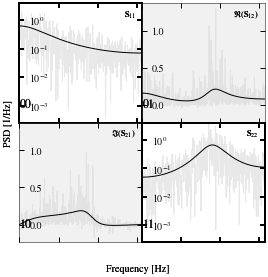

In [3]:
var2.plot(
    off_symlog=False,
    xlims=[0, np.pi]
)
plt.savefig(f'var2_data.png')
plt.close()

![VAR(2) Data](var2_data.png)

In [5]:
from sgvb_psd.psd_estimator import PSDEstimator

optim = PSDEstimator(
    x=var2.data,
    N_theta=30, nchunks=1, 
    ntrain_map=1000,  
    max_hyperparm_eval=5,
    fs=2*np.pi,
)
optim.run(lr=0.003)
_ = optim.plot(
    true_psd=[var2.psd, var2.freq], 
    off_symlog=False,
    xlims=[0, np.pi],
);
plt.savefig(f'var2_psd.png');
plt.close()

12:27:08|SGVB-PSD|INFO| 174s |Final PSD will be of shape: 512 x 2 x 2
12:27:08|SGVB-PSD|DEBUG| 174s |Inputted data shape: (1024, 2)
12:27:08|SGVB-PSD|DEBUG| 174s |Model instantiated: SpecPrep(x(t)=(1024, 2), y(f)=(1, 512, 2), Xmat_delta=(512, 32), Xmat_theta=(512, 32))
12:27:08|SGVB-PSD|INFO| 174s |Using provided learning rate: 0.003
12:27:08|SGVB-PSD|INFO| 174s |Training model
12:27:08|SGVB-PSD|DEBUG| 174s |Starting Model Inference Training..
12:27:08|SGVB-PSD|DEBUG| 174s |Start Point Estimating... 
12:27:12|SGVB-PSD|DEBUG| 178s |MAP Training Time: 4.19s
12:27:12|SGVB-PSD|DEBUG| 178s |Start ELBO maximisation... 
12:27:24|SGVB-PSD|DEBUG| 190s |VI Time: 11.65s
12:27:24|SGVB-PSD|DEBUG| 190s |Total Inference Training Time: 15.94s
12:27:24|SGVB-PSD|INFO| 190s |Model trained in 16.19s
12:27:24|SGVB-PSD|INFO| 190s |Computing posterior PSDs
12:27:25|SGVB-PSD|INFO| 191s |Optimal PSD estimation complete in 1.47s


![VAR(2) PSD](var2_psd.png)

In [6]:
_ = optim.plot_coherence(
    true_psd=[var2.psd, var2.freq], 
    labels='XY'
    
)
plt.savefig(f'var2_coh.png');
plt.close()

![VAR(2) Coherence](var2_coh.png)

In [8]:
_ = optim.plot_vi_losses()
plt.savefig(f'var2_vi_losses.png');
plt.close()

![VAR(2) VI Losses](var2_vi_losses.png)